In [132]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import itertools
import math 
import numpy as np
import seaborn as sns
from tqdm import tqdm
import bioframe as bf

from numpy import inf
import scipy.stats as stats
from statannot import add_stat_annotation
from gseapy import barplot, dotplot
import bioframe as bf
import scipy.stats as stats
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy.stats import ttest_ind
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable

from dotenv import load_dotenv
assert os.environ['CONDA_DEFAULT_ENV'] == "cultures_hic"
load_dotenv()

True

In [112]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Helvetica'
mpl.rc('lines', linewidth=0.4)
mpl.rc('font', family='Helvetica', size=8)
mpl.rc('axes', labelsize=8, titlesize=8, linewidth=0.4)
mpl.rc('legend', fontsize=8)
mpl.rc('xtick', labelsize=6)
mpl.rc('xtick.major', width=0.4, size=2)
mpl.rc('xtick.minor', width=0.4, size=1)
mpl.rc('ytick', labelsize=6)
mpl.rc('ytick.major', width=0.4, size=2)
mpl.rc('ytick.minor', width=0.4, size=1)

In [105]:
path_to_maps = os.getenv('PATH_TO_MAPS')
path_to_maps_expected = os.getenv('PATH_TO_EXPECTED_MAPS')

name_appender = ""
save_name = "loops_clustering_post_mortem_vs_iPSC_derived"
path_to_loops_clusters_data = "./loops_data/loops_clusters_data"
clusters_is_loop= pd.read_pickle(f"{path_to_loops_clusters_data}/{save_name}_calculated_clusters_all_withLoopNotation_withCentral.pickle")


In [6]:
clusters_only_loops = clusters_is_loop.loc[~(clusters_is_loop.intensity_median.isna()) & (clusters_is_loop.is_loop_loop_ratio == True) & (clusters_is_loop.is_loop_loop_central == True)]
clusters_only_loops['is_loop'] = True

/tmp/ipykernel_682116/2836479395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters_only_loops['is_loop'] = True


# 1. Loops length

In [41]:
samples2groups =  {i:"iPSC-derived" if "iPSC" in i else "Post-mortem" for i in clusters_only_loops.source.unique()}
clusters_only_loops['group'] = clusters_only_loops['source'].map(samples2groups)


In [42]:
clusters_only_loops['length'] = clusters_only_loops['end2'] - clusters_only_loops["end1"]
clusters_only_loops['length_kb'] = clusters_only_loops['length']/1000
samples2groups =  {i:"iPSC-derived" if "iPSC" in i else "Post-mortem" for i in clusters_only_loops.source.unique()}
clusters_only_loops['short_name'] = [i if not "Rahman2023_iPSC_NeuNplus_CRISPRi_Scrambled_" in i else "Rahman2023_iPSC" for i in clusters_only_loops['source']]
clusters_only_loops['short_name'] = [i.split("_sampled_dots_final")[0].split("_iPSC_")[0].split("_NeuNplus")[0] for i in clusters_only_loops['short_name']]
clusters_only_loops.group = clusters_only_loops.group.map({'Post-mortem':"Post-mortem neurons", 'iPSC-derived':"iPSC-derived neurons"})
clusters_only_loops.groupby('source').size()

source
Ballerino2022_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed                                 16305
Heffel_adult_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed                                                17655
Hu2021_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed                                             17180
Li2022_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed                                        16539
Our_data_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed                                      16083
Pletenev2024_NeuNplus_sampled_dots_final_1200000

In [43]:
mapping = pd.read_pickle('./loops_data/mapping_with_loops.pickle')
clusters_only_loops['short_name'] =clusters_only_loops.source.map(dict(mapping[['loop_file', 'sample_init']].values))
clusters_only_loops['short_name_for_plot'] =clusters_only_loops.source.map(dict(mapping[['loop_file', 'short_name_for_plot']].values))
clusters_only_loops['short_name_for_plot'].unique()

array(['Tian', 'Zaghi', 'Wu', 'Rahman\n(iPSC-derived\nneurons)',
       'Rahman\n(Post-mortem\nneurons)',
       'Our data\n(Post-mortem\nneurons)', 'Rajarajan', 'Heffel',
       'Our data\n(iPSC-derived\nneurons)', 'Ballerino', 'Li', 'Hu'],
      dtype=object)

In [44]:
clusters_only_loops[['short_name', 'group']].drop_duplicates().set_index('short_name').to_dict()

{'group': {'Tian2023_NeuNplus': 'Post-mortem neurons',
  'Zaghi2023_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Wu2021_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Rahman2023_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Rahman2023_NeuNplus': 'Post-mortem neurons',
  'Pletenev2024_NeuNplus': 'Post-mortem neurons',
  'Rajarajan_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Heffel_adult': 'Post-mortem neurons',
  'Our_data_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Ballerino2022_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Li2022_iPSC_NeuNplus': 'iPSC-derived neurons',
  'Hu2021_NeuNplus': 'Post-mortem neurons'}}

In [45]:
clusters_only_loops.sort_values("group")[['group', 'cluster', 'short_name']].drop_duplicates().groupby(['group', 'short_name']).size().to_frame().sort_values(['group',  0])

0
group                short_name                        
Post-mortem neurons  Rahman2023_NeuNplus          16891
                     Pletenev2024_NeuNplus        16948
                     Hu2021_NeuNplus              17180
                     Heffel_adult                 17655
                     Tian2023_NeuNplus            18214
iPSC-derived neurons Our_data_iPSC_NeuNplus       16083
                     Ballerino2022_iPSC_NeuNplus  16305
                     Wu2021_iPSC_NeuNplus         16363
                     Li2022_iPSC_NeuNplus         16539
                     Zaghi2023_iPSC_NeuNplus      16901
                     Rajarajan_iPSC_NeuNplus      17168
                     Rahman2023_iPSC_NeuNplus     17318

In [46]:
loops_number = clusters_only_loops.sort_values("group")[['group', 'cluster', 'short_name']].drop_duplicates().groupby(['group', 'short_name']).size().to_frame().sort_values(0)

In [47]:
group1 = loops_number.reset_index().query('group == "iPSC-derived neurons"')[0].tolist()
group2 = loops_number.reset_index().query('group == "Post-mortem neurons"')[0].tolist()
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f'U statistic: {u_statistic}')
print(f'P-value: {p_value}')

U statistic: 6.0
P-value: 0.07323232323232323


In [48]:
df_size = clusters_only_loops.sort_values("group")[['group', 'cluster', 'short_name_for_plot']].drop_duplicates().groupby(['group', 'short_name_for_plot']).size().to_frame().reset_index()
df_size.columns = ['group', 'short_name_for_plot', 'number of loops']
df_size.short_name_for_plot

0                                Heffel
1                                    Hu
2      Our data\n(Post-mortem\nneurons)
3        Rahman\n(Post-mortem\nneurons)
4                                  Tian
5                             Ballerino
6                                    Li
7     Our data\n(iPSC-derived\nneurons)
8       Rahman\n(iPSC-derived\nneurons)
9                             Rajarajan
10                                   Wu
11                                Zaghi
Name: short_name_for_plot, dtype: object

In [49]:
group1 = df_size[df_size['group'] == 'Post-mortem neurons']['number of loops']
group2 = df_size[df_size['group'] == 'iPSC-derived neurons']['number of loops']
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f'U statistic: {u_statistic}')
print(f'P-value: {p_value}')


U statistic: 29.0
P-value: 0.07323232323232323


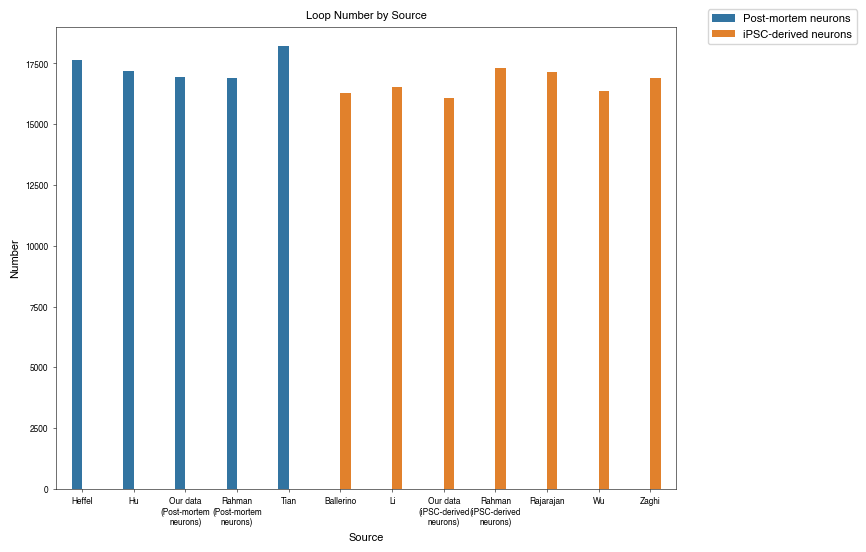

In [50]:
plt.figure(figsize=(8, 6))
hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 
hue_order = df_size.group.unique()

ax = sns.barplot(x='short_name_for_plot', y='number of loops',
                 width=0.4, hue='group', data=df_size,
                 hue_order=hue_order
                )
plt.ylim(0, 19000)
plt.title('Loop Number by Source')
plt.xlabel('Source')
plt.ylabel('Number')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

U statistic: 4897231299.0
P-value: 3.6156567861919e-39
T statistic: -7.749495751189037
P-value: 9.27172705733667e-15


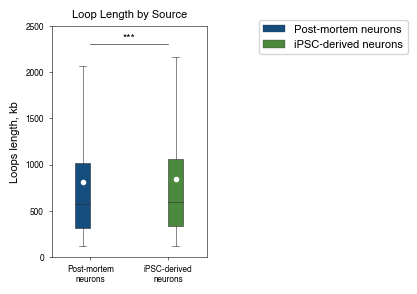

In [51]:
group1 = clusters_only_loops[clusters_only_loops['group'] == 'Post-mortem neurons']['length_kb']
group2 = clusters_only_loops[clusters_only_loops['group'] == 'iPSC-derived neurons']['length_kb']
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f'U statistic: {u_statistic}')
print(f'P-value: {p_value}')

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f'T statistic: {t_statistic}')
print(f'P-value: {p_value}')

plt.figure(figsize=(2, 3))

hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 

palette = {'iPSC-derived neurons' : '#469433',
    'Stem-like cells' : 'dimgrey',
    'Fetal neurons' : '#9c2725',
    'Post-mortem neurons' : '#034e91',
    'Post-mortem non-neurons' : '#764e3f',
    'iPSC-derived glia' : '#ffa500',
    "Primary neurons":"#77658c"}

ax = sns.boxplot(x='group', y='length_kb', width=0.4, data=clusters_only_loops,
                 showmeans=True,
                 hue = 'group',
                boxprops=dict(linewidth=0.4),
                 whiskerprops=dict(linewidth=0.4),
                 capprops=dict(linewidth=0.4),
                 medianprops=dict(linewidth=0.4),
                 palette = palette,
                 meanprops={"marker": "o",
                            "markeredgecolor": "white",
                            "markerfacecolor": "white",
                            "markersize": "3"},
                 showfliers=False)

save_name = "loops_length"
x1, x2 = 0, 1  
y_position = clusters_only_loops['length_kb'].max()
y_position = 2300
y, h, col = y_position + 6, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.4, c=col)
# plt.text((x1+x2)*.5, y+h, f'p = {p_value:.3e} {significance}', ha='center', va='bottom', color=col)
plt.text((x1+x2)*.5, y+h, f'***', ha='center', va='bottom', color=col)

plt.title('Loop Length by Source')
plt.xlabel('')
plt.ylabel('Loops length, kb')
ax.set_xticklabels(['Post-mortem\nneurons', 'iPSC-derived\nneurons'])
# plt.xticks(rotation=45)
plt.xlim(-0.5, 1.5)
plt.ylim(0, 2500)
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")
plt.show()

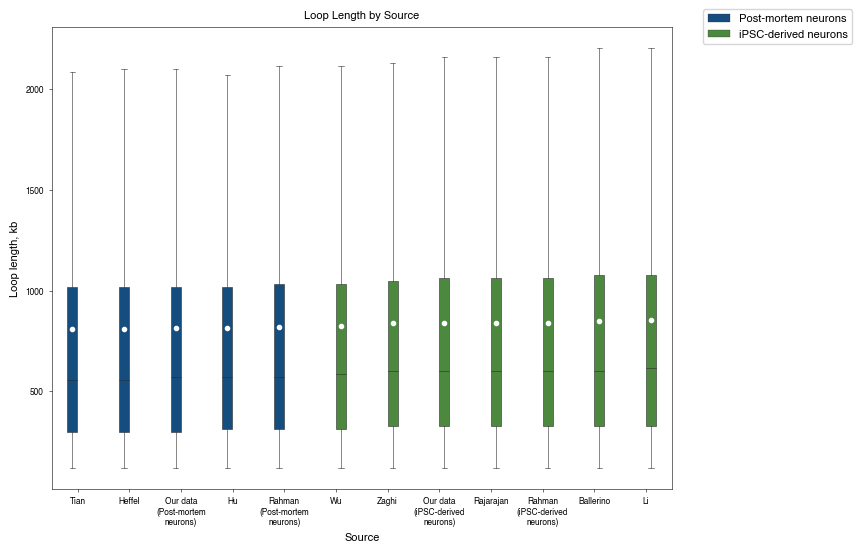

In [54]:
plt.figure(figsize=(8, 6))
order =['Tian',
 'Heffel',
 'Our data\n(Post-mortem\nneurons)',
 'Hu',
 'Rahman\n(Post-mortem\nneurons)',
 'Wu',
 'Zaghi',
 'Our data\n(iPSC-derived\nneurons)',
 'Rajarajan',
 'Rahman\n(iPSC-derived\nneurons)',
 'Ballerino',
 'Li']

hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 

ax = sns.boxplot(x='short_name_for_plot', y='length_kb', 
                 width=0.4, hue='group', 
                 data=clusters_only_loops,
                 order=order, 
                 hue_order=hue_order,
                 showmeans=True,
                 boxprops=dict(linewidth=0.4),
                 whiskerprops=dict(linewidth=0.4),
                 capprops=dict(linewidth=0.4),
                 medianprops=dict(linewidth=0.4),
                 palette = palette,
                 meanprops={"marker": "o",
                            "markeredgecolor": "white",
                            "markerfacecolor": "white",
                            "markersize": "3"},
                 showfliers=False)
plt.title('Loop Length by Source')
plt.xlabel('Source')
plt.ylabel('Loop length, kb')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

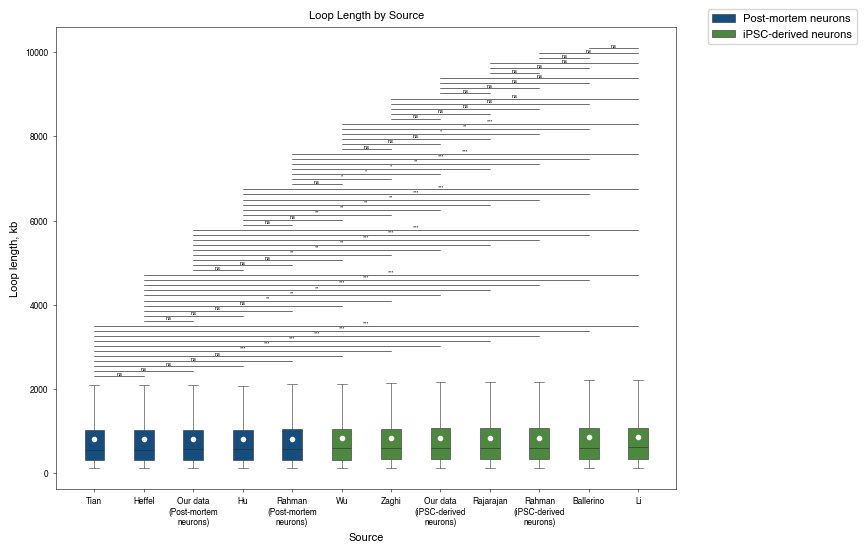

In [202]:
from scipy.stats import ttest_ind
import itertools

plt.figure(figsize=(8, 6))
order =['Tian','Heffel', 'Our data\n(Post-mortem\nneurons)','Hu', 'Rahman\n(Post-mortem\nneurons)', 'Wu', 
        'Zaghi', 'Our data\n(iPSC-derived\nneurons)', 'Rajarajan', 'Rahman\n(iPSC-derived\nneurons)', 'Ballerino', 'Li']

hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 
ax = sns.boxplot(x='short_name_for_plot', y='length_kb', 
                 width=0.4, hue='group', 
                 data=clusters_only_loops,
                 order=order, 
                 hue_order=hue_order,
                 showmeans=True,
                 palette = palette,
                 boxprops=dict(linewidth=0.4),
                 whiskerprops=dict(linewidth=0.4),
                 capprops=dict(linewidth=0.4),
                 medianprops=dict(linewidth=0.4),
                 meanprops={"marker": "o",
                            "markeredgecolor": "white",
                            "markerfacecolor": "white",
                            "markersize": "3"},
                 showfliers=False)
plt.title('Loop Length by Source')
plt.xlabel('Source')
plt.ylabel('Loop length, kb')
plt.legend(bbox_to_anchor=(1.3, 1.05))

combinations = list(itertools.combinations(order, 2))
y_position = 2300
h = 0
col = 'k'

for (i, (group1, group2)) in enumerate(combinations):
    data1 = clusters_only_loops[clusters_only_loops['short_name_for_plot'] == group1]['length_kb']
    data2 = clusters_only_loops[clusters_only_loops['short_name_for_plot'] == group2]['length_kb']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    if p_value < 0.05:
        significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' 
        
    else:
        significance = 'ns'      
    x1, x2 = order.index(group1), order.index(group2)
    y = y_position + i * 120
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.4, c=col)      
    plt.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col, fontsize=4)

# plt.ylim(0, 13000)
save_name = "loops_length_all"
plt.savefig(f"/tank/projects/diana_hic/cultures_vs_postmortem/1_loops/loops_visualizations/loops_paper_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")

plt.show()

# 2. Loops intensity

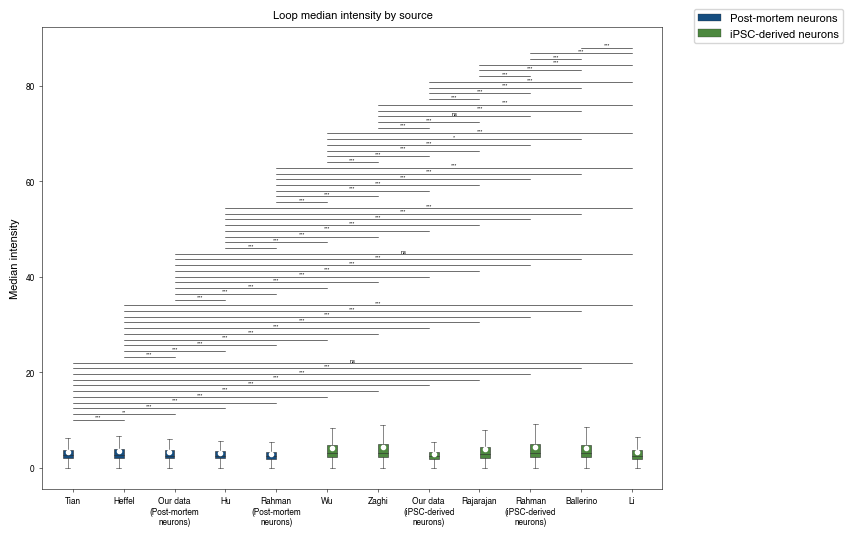

In [59]:
plt.figure(figsize=(8, 6))
order =['Tian','Heffel', 'Our data\n(Post-mortem\nneurons)','Hu', 'Rahman\n(Post-mortem\nneurons)', 'Wu', 
        'Zaghi', 'Our data\n(iPSC-derived\nneurons)', 'Rajarajan', 'Rahman\n(iPSC-derived\nneurons)', 'Ballerino', 'Li']

hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 
ax = sns.boxplot(x='short_name_for_plot', y='intensity_median', 
                 width=0.4, hue='group', 
                 data=clusters_only_loops,
                 order=order, 
                 hue_order=hue_order,
                 showmeans=True,
                 palette = palette,
                 boxprops=dict(linewidth=0.4),
                 whiskerprops=dict(linewidth=0.4),
                 capprops=dict(linewidth=0.4),
                 medianprops=dict(linewidth=0.4),
                 meanprops={"marker": "o",
                            "markeredgecolor": "white",
                            "markerfacecolor": "white",
                            "markersize": "3"},
                 showfliers=False)
plt.title('Loop median intensity by source')
plt.xlabel('')
plt.ylabel('Median intensity')
plt.legend(bbox_to_anchor=(1.3, 1.05))

combinations = list(itertools.combinations(order, 2))
y_position = 10
h = 0
col = 'k'

for (i, (group1, group2)) in enumerate(combinations):
    data1 = clusters_only_loops[clusters_only_loops['short_name_for_plot'] == group1]['intensity_median']
    data2 = clusters_only_loops[clusters_only_loops['short_name_for_plot'] == group2]['intensity_median']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    if p_value < 0.05:
        significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' 
        
    else:
        significance = 'ns'      
    x1, x2 = order.index(group1), order.index(group2)
    y = y_position + i *1.2
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.4, c=col)      
    plt.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col, fontsize=4)

save_name = "loops_intensities_all"
plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")

plt.show()

U statistic: 4333345202.0
P-value: 0.0
T statistic: -51.90401214692562
P-value: 0.0


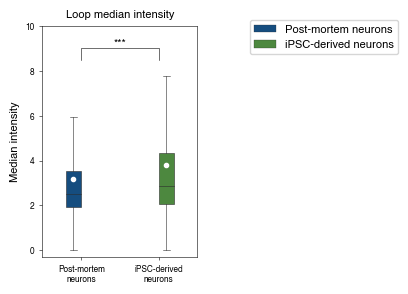

In [63]:
group1 = clusters_only_loops[clusters_only_loops['group'] == 'Post-mortem neurons']['intensity_median']
group2 = clusters_only_loops[clusters_only_loops['group'] == 'iPSC-derived neurons']['intensity_median']
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f'U statistic: {u_statistic}')
print(f'P-value: {p_value}')

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f'T statistic: {t_statistic}')
print(f'P-value: {p_value}')

plt.figure(figsize=(2, 3))

hue_order = ['Post-mortem neurons', 'iPSC-derived neurons'] 

palette = {'iPSC-derived neurons' : '#469433',
    'Stem-like cells' : 'dimgrey',
    'Fetal neurons' : '#9c2725',
    'Post-mortem neurons' : '#034e91',
    'Post-mortem non-neurons' : '#764e3f',
    'iPSC-derived glia' : '#ffa500',
    "Primary neurons":"#77658c"}

ax = sns.boxplot(x='group', y='intensity_median', width=0.4, data=clusters_only_loops,
                 showmeans=True,
                 hue = 'group',
                boxprops=dict(linewidth=0.4),
                 whiskerprops=dict(linewidth=0.4),
                 capprops=dict(linewidth=0.4),
                 medianprops=dict(linewidth=0.4),
                 palette = palette,
                 meanprops={"marker": "o",
                            "markeredgecolor": "white",
                            "markerfacecolor": "white",
                            "markersize": "3"},
                 showfliers=False)

save_name = "intensity_median"
x1, x2 = 0, 1  
y_position = 8.5
y, h, col = y_position, 0.5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.4, c=col)
plt.text((x1+x2)*.5, y+h, f'***', ha='center', va='bottom', color=col)

plt.title('Loop median intensity')
plt.xlabel('')
plt.ylabel('Median intensity')
ax.set_xticklabels(['Post-mortem\nneurons', 'iPSC-derived\nneurons'])
plt.xlim(-0.5, 1.5)
plt.ylim(-0.3, 10)
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")
plt.show()

# 3. Loops clusterization based on properties

In [84]:
# save_name = "loops_clustering_post_mortem_vs_iPSC_derived"
# merged_all_clusters_stats = pd.read_pickle(f'/tank/projects/diana_hic/cultures_vs_postmortem/1_loops/loops_clusters/main_files/merged_all_clusters_stats_{save_name}_withStats.pickle')
# merged_all_clusters_stats = merged_all_clusters_stats.drop(columns = ['is_loop']).merge(clusters_only_loops[['cluster', 'source', 'is_loop']].drop_duplicates(),how='left', on =['cluster', 'source'])

save_name = "loops_clustering_post_mortem_vs_iPSC_derived"
merged_all_clusters= pd.read_pickle(f"{path_to_loops_clusters_data}/{save_name}_merged_all_clusters_Properties.pickle")

In [65]:
common = {}
column_selected = "short_name_for_plot"
sources = clusters_only_loops[column_selected].unique()
sources.sort()
cnt=0
for source1 in sources:
    clusters1 = clusters_only_loops[clusters_only_loops[column_selected] ==source1].cluster.unique().tolist()
    common[source1] ={}
    common[source1]['total in source 1'] = len(set(clusters1))
    for source2 in sources: 
        if source1!=source2:
            clusters2 = clusters_only_loops[clusters_only_loops[column_selected] ==source2].cluster.unique().tolist()
            common[source1][f"Common with {source2}"] = len(set(clusters1) & set(clusters2)) / len(set(clusters1))
        else:
            clusters2 = clusters_only_loops[clusters_only_loops[column_selected] ==source2].cluster.unique().tolist()
            common[source1][f"Common with {source2}"] = len(set(clusters1) & set(clusters2)) / len(set(clusters1))
            
    cnt+=1

  
total_clusters = {source: data['total in source 1'] for source, data in common.items()}
total_clusters_df = pd.DataFrame.from_dict(total_clusters, orient='index', columns=['Total Clusters'])

# Create a DataFrame for intersections
intersection_data = {}
for source1, data in common.items():
    for key, value in data.items():
        if key.startswith('Common with'):
            source2 = key.split('Common with ')[-1]
            if source1 not in intersection_data:
                intersection_data[source1] = {}
            intersection_data[source1][source2] = value

intersection_df = pd.DataFrame.from_dict(intersection_data, orient='index').fillna(0)

In [70]:
group_colors = {i:k for i,k in palette.items() if i in clusters_only_loops.group.unique()}

In [88]:
row_colors = []
group_dict = {}
for sample in intersection_df.columns:
    group = mapping[mapping.short_name_for_plot == sample].Group.tolist()[0]
    color = group_colors[group]
    row_colors.append(color)
    group_dict[sample] = group

<Figure size 400x400 with 0 Axes>

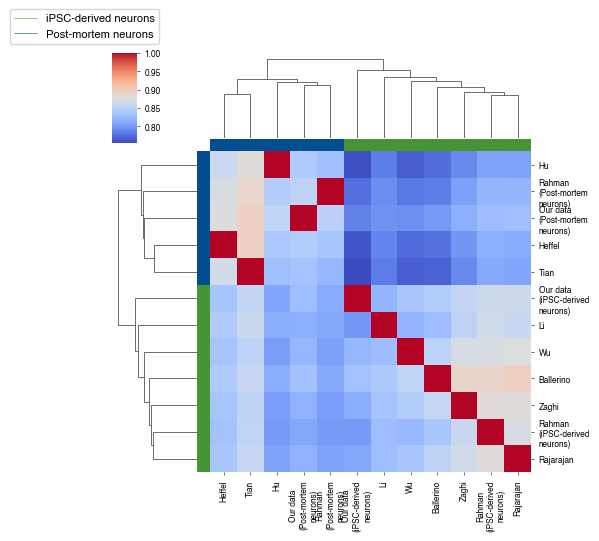

In [80]:
plt.figure(figsize=(4, 4))
sns.clustermap(intersection_df, cmap="coolwarm", row_colors=row_colors, col_colors=row_colors, figsize=(5, 5))

for label in group_colors:
    plt.plot([0], [0], color=group_colors[label], label=label)
plt.legend(bbox_to_anchor=(2.1, 1.55))
plt.show()

In [81]:
common = {}
column_selected = "short_name_for_plot"
sources = clusters_only_loops[column_selected].unique()
sources.sort()

for source1 in sources:
    clusters1 = set(clusters_only_loops[clusters_only_loops[column_selected] == source1].cluster.unique())
    common[source1] = {}
    common[source1]['total in source 1'] = len(clusters1)
    for source2 in sources:
        clusters2 = set(clusters_only_loops[clusters_only_loops[column_selected] == source2].cluster.unique())
        jaccard_similarity = len(clusters1 & clusters2) / len(clusters1 | clusters2)
        common[source1][f"Common with {source2}"] = jaccard_similarity

intersection_data = {}
for source1, data in common.items():
    for key, value in data.items():
        if key.startswith('Common with'):
            source2 = key.split('Common with ')[-1]
            if source1 not in intersection_data:
                intersection_data[source1] = {}
            intersection_data[source1][source2] = value

intersection_df = pd.DataFrame.from_dict(intersection_data, orient='index').fillna(0)

In [87]:
df = merged_all_clusters[['short_name_for_plot','cluster','intensity_median']].drop_duplicates()
pivot_df = df.pivot(index='cluster', columns='short_name_for_plot', values='intensity_median')
correlation_matrix = pivot_df.corr()
group_colors = {i:k for i,k in palette.items() if i in clusters_only_loops.group.unique()}
row_colors = pd.DataFrame([group_dict[sample] for sample in intersection_df.index], index=intersection_df.index, columns=['Group'])
row_colors['Group'] = row_colors['Group'].map(group_colors)


### Common heatmap

In [92]:
loops_df = df_size
loops_compare_corrs = correlation_matrix
loops_compare_frac = intersection_df

samples_df = {
    'Simple_Name': {
        'Heffel': 'Heffel',
        'Hu': 'Hu',
        'Our data\n(Post-mortem\nneurons)': 'Our data\n(Post-mortem\nneurons)',
        'Rahman\n(Post-mortem\nneurons)': 'Rahman\n(Post-mortem\nneurons)',
        'Tian': 'Tian',
        'Ballerino': 'Ballerino',
        'Li': 'Li',
        'Our data\n(iPSC-derived\nneurons)': 'Our data\n(iPSC-derived\nneurons)',
        'Rahman\n(iPSC-derived\nneurons)': 'Rahman\n(iPSC-derived\nneurons)',
        'Rajarajan': 'Rajarajan',
        'Wu': 'Wu',
        'Zaghi': 'Zaghi'
    },
    'Group': group_dict
}
groups_colors = {i:k for i,k in group_colors.items() if i in samples_df['Group'].values()}


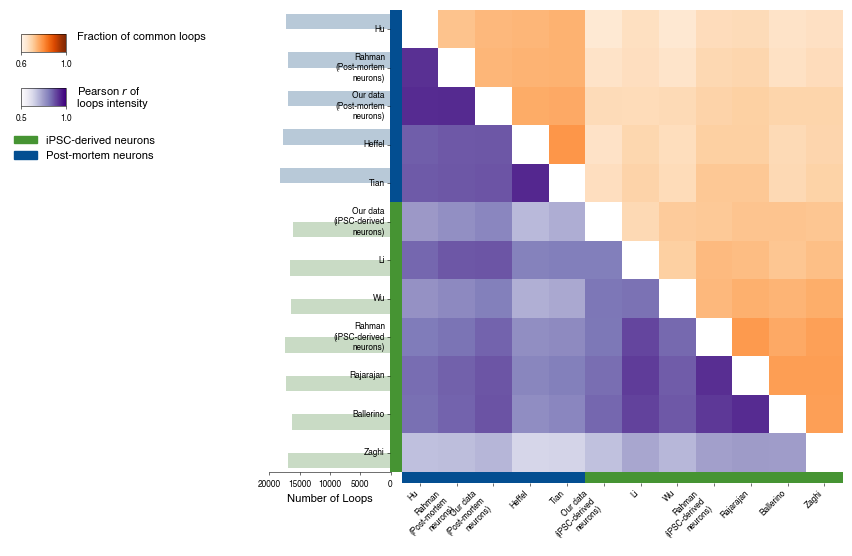

In [100]:
vmin_corr = 0.5
vmin_frac = 0.6
fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    figsize=(7.4, 6),
    gridspec_kw={'width_ratios': [1.1, 4]},
)

order = [
    'Hu', 'Rahman\n(Post-mortem\nneurons)',
    'Our data\n(Post-mortem\nneurons)', 'Heffel', 'Tian',
    'Our data\n(iPSC-derived\nneurons)', 'Li', 'Wu',
    'Rahman\n(iPSC-derived\nneurons)', 'Rajarajan', 'Ballerino', 'Zaghi'
]

plt.subplots_adjust(wspace=0.039)

sns.barplot(
    data=loops_df,
    y='short_name_for_plot',
    x='number of loops',
    hue='group',
    palette=groups_colors,
    order=order,
    alpha=0.3,
    ax=ax1
)

# Remove the legend if it's not desired
ax1.get_legend().remove()

ax1.set_ylabel('')
ax1.set_xlabel('Number of Loops')
ax1.spines[['right', 'top', 'left']].set_visible(False)
ax1.set_yticks([])
ax1.set_xticks([0, 5000, 10000, 15000, 20000])
ax1.invert_xaxis()

assert loops_compare_corrs.shape == loops_compare_frac.shape
loops_compare_corrs = loops_compare_corrs.reindex(order)[order]
loops_compare_frac = loops_compare_frac.reindex(order)[order]

# Lower triangle heatmap
sns.heatmap(
    loops_compare_corrs,
    mask=np.triu(np.ones(shape=loops_compare_corrs.shape)),
    cmap="Purples",
    cbar=False,
    vmin=vmin_corr,
    vmax=1,
    ax=ax2
)

# Upper triangle heatmap
sns.heatmap(
    loops_compare_frac,
    mask=np.tril(np.ones(shape=loops_compare_frac.shape)),
    cmap="Oranges",
    cbar=False,
    vmin=vmin_frac,
    vmax=1,
    ax=ax2,
)

ax = ax2

# Rename labels to Simple_Names
ax.set_xticklabels(
    [samples_df['Simple_Name'][l.get_text()] for l in ax.get_xticklabels()],
    rotation=45,
    ha='right'
)
ax.set_yticklabels(
    [samples_df['Simple_Name'][l.get_text()] for l in ax.get_yticklabels()]
)

# Draw color boxes marking group
col_colors = loops_compare_corrs.columns.to_series().map(samples_df['Group']).map(groups_colors)
row_colors = loops_compare_corrs.index.to_series().map(samples_df['Group']).map(groups_colors)

for i, color in enumerate(col_colors):
    ax.add_patch(plt.Rectangle(
        xy=(i, -0.025),
        height=0.025,
        width=1,
        color=color,
        lw=0,
        transform=ax.get_xaxis_transform(),
        clip_on=False
    ))

for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(
        xy=(-0.025, i),
        width=0.025,
        height=1,
        color=color,
        lw=0,
        transform=ax.get_yaxis_transform(),
        clip_on=False
    ))

# Shift ticks and labels
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)

for line in ax.get_xticklines():
    line.set_data([0, -0.025])

for line in ax.get_yticklines():
    line.set_data([-0.025, 0])

plt.xlabel('')
plt.ylabel('')

plt.legend(
    handles=[mpatches.Patch(color=color, label=label) for label, color in groups_colors.items()],
    bbox_to_anchor=(-.9, 0.75),
    loc='upper left',
    fontsize=8,
    frameon=False
)

cbar_x, cbar_y = -.21, 0.81
cbar_v, cbar_h = .03, .06

cax = plt.gcf().add_axes([cbar_x, cbar_y, cbar_h, cbar_v], clip_on=False)
mpl.colorbar.ColorbarBase(
    norm=mcolors.Normalize(vmin=vmin_frac, vmax=1),
    cmap=plt.get_cmap('Oranges'),
    ax=cax,
    orientation='horizontal',
    ticks=[vmin_frac, 1],
    label=''
)
cax.set_ylabel(
    'Fraction of common loops\n',
    rotation=0,
    ha='left',
    va='center',
    fontsize=8,
    labelpad=-40
)

cax = plt.gcf().add_axes([cbar_x, cbar_y - .09, cbar_h, cbar_v], clip_on=False)
mpl.colorbar.ColorbarBase(
    norm=mcolors.Normalize(vmin=vmin_corr, vmax=1),
    cmap=plt.get_cmap('Purples'),
    ax=cax,
    orientation='horizontal',
    ticks=[vmin_corr, 1],
    label=''
)
cax.set_ylabel(
    'Pearson $r$ of\nloops intensity',
    rotation=0,
    ha='left',
    va='center',
    fontsize=8,
    labelpad=-40
)

save_name = "combined_correlation_loops"
plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format="pdf")
plt.show()

# 4. Average loop

In [98]:
import cooler
import bioframe
import cooltools

In [99]:
def get_source2map(merged_bedpe_clf_2_filtered, maps2loops):
    source2map = {}
    for k in merged_bedpe_clf_2_filtered.source.unique():
        name = k.split("_sampled_dots_final_")[0]
        map = [k for k,i in maps2loops.items() if name in i]
        assert len(map) == 1
        source2map[k] = map[0].split('/')[-1]
    return source2map

In [101]:
import json
maps2loops = json.load(open('./loops_data/maps2loops_mapping.json'))
source2map = get_source2map(clusters_only_loops, maps2loops)
sources = clusters_only_loops.source.unique()

### 1. Sample by sample

In [106]:
maps_stored = {}
for source in sources:
    maps_stored[source] = {}
    map_name = source2map[source]
    print(source, map_name)
    clr = cooler.Cooler(f'{path_to_maps}/{source2map[source]}::/resolutions/{15000}')
    maps_stored[source]['clr'] = clr
    reduced_maps2loops = source2map[source].split('.mcool', 0)[0]
    maps_stored[source]['expected'] = pd.read_pickle(f'{path_to_maps_expected}/{reduced_maps2loops}_perChrArm.pickle')
    

Tian2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed Tian2023_NeuNplus.EN_IN.29_42_58_years.2000_cells.sampled_exact.mcool
Zaghi2023_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed Zaghi2023_iPSC_NeuNplus.sampled_exact.mcool
Wu2021_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed Wu2021_iPSC_NeuNplus.sampled_exact.mcool
Rahman2023_iPSC_NeuNplus_CRISPRi_Scrambled_A_DpnII-HinfI_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed Rahman2023_iPSC_NeuNplus_CRISPRi_Scrambled_A_DpnII-HinfI.sampled_exact.mcool
Rahman2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed Rahman2023_Ne

In [107]:
def get_hg38_arms():
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    return hg38_arms[hg38_arms.chrom!='chrM'].reset_index(drop=True)
def create_matrix_calculated(source, merged_all_clusters_cluster,factor = 5,resolution = 15_000 ):    
    flank=factor*resolution
    stack = cooltools.pileup(maps_stored[source]['clr'], 
                             merged_all_clusters_cluster, 
                             view_df=hg38_arms, 
                             expected_df=maps_stored[source]['expected'], 
                             flank=flank)
    
    # stack[:, :, np.all(stack == 0, axis=(0,1))] = np.nan
    mtx = np.nanmean(stack, axis=0)
    return mtx, stack

def plot_loop(mtx_from_cluster,label = None, factor = 5,resolution = 15_000):    
    flank=factor*resolution
    plt.imshow(
        np.log2(mtx_from_cluster),
        vmax = 2,
        vmin = -2,
        cmap='coolwarm')
    
    plt.colorbar(label = 'log2 mean obs/exp')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('Relative position, Kbp')
    plt.ylabel('Relative position, kbp')
    if label:
        plt.title(label)
    
    plt.show()

    
hg38_arms = get_hg38_arms() 


## 2. All sample by groups

In [125]:
def plot_ratio_all_loops(mean_loop, vmax=1, factor=13, resolution=15000, size=5, save_name = "loops_median_ratio"):
    plt.figure(figsize=(size, size))
    flank = factor * resolution
    data = np.log2(mean_loop['Post-mortem neurons'] / mean_loop['iPSC-derived neurons'])
    
    ax = plt.gca()
    im = ax.imshow(
        data,
        vmax=vmax,
        vmin=-vmax,
        cmap='coolwarm'
    )
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('log2 mean intensity(observed/expected)')
    
    ticks_pixels = np.linspace(0, flank * 2 // resolution, 5)
    ticks_kbp = ((ticks_pixels - ticks_pixels[-1] / 2) * resolution // 1000).astype(int)
    ax.set_xticks(ticks_pixels)
    ax.set_xticklabels(ticks_kbp)
    ax.set_yticks(ticks_pixels)
    ax.set_yticklabels(ticks_kbp)
    
    ax.set_title('Average loop\n(Post-mortem / iPSC-derived neurons)')
    ax.set_xlabel('Relative position, Kb')
    ax.set_ylabel('Relative position, Kb')
    save_name = 'loop_average_ratio'
    
    plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")
    
    plt.show()
    return data

Tian2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


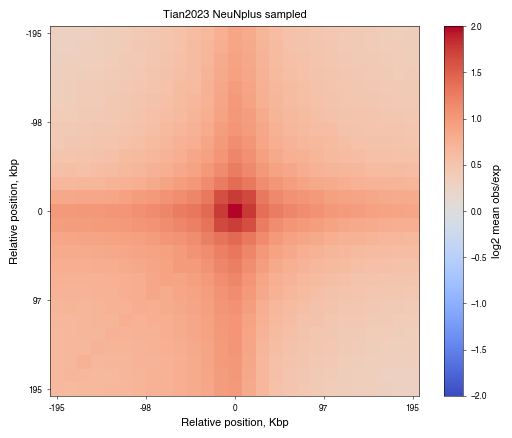

Zaghi2023_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


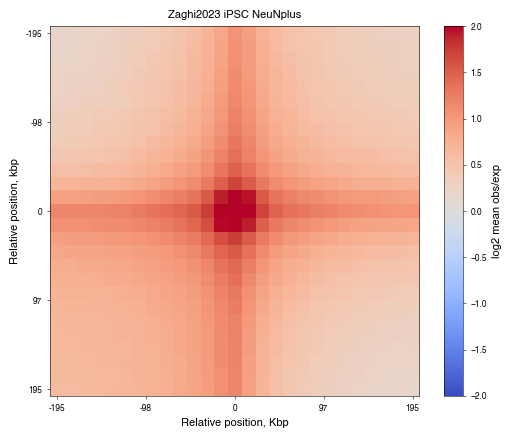

Wu2021_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


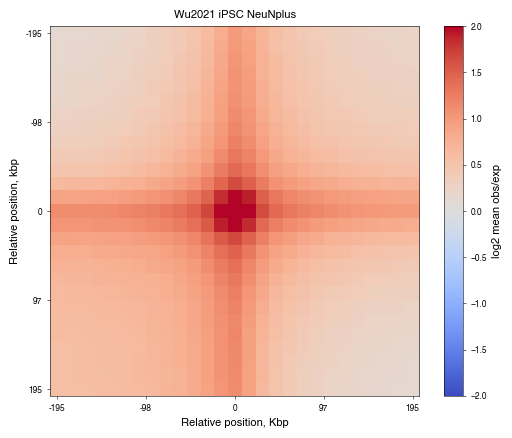

Rahman2023_iPSC_NeuNplus_CRISPRi_Scrambled_A_DpnII-HinfI_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


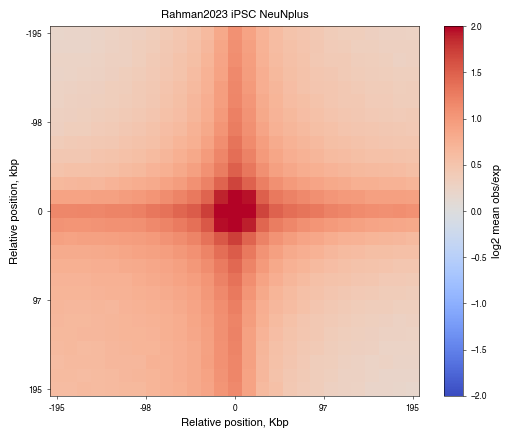

Rahman2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


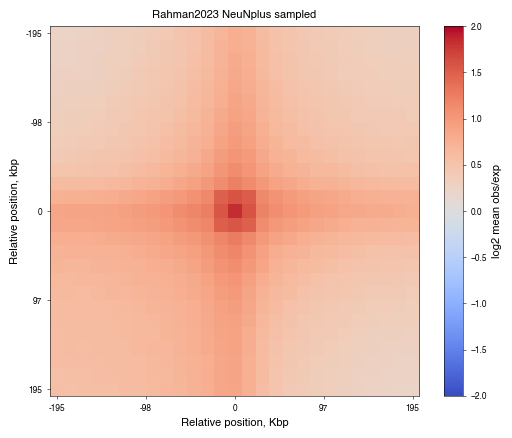

Pletenev2024_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


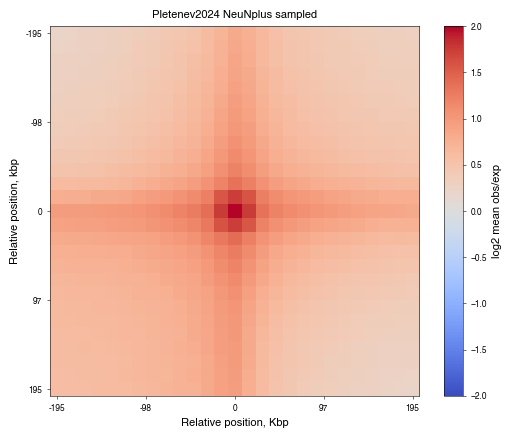

Rajarajan_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


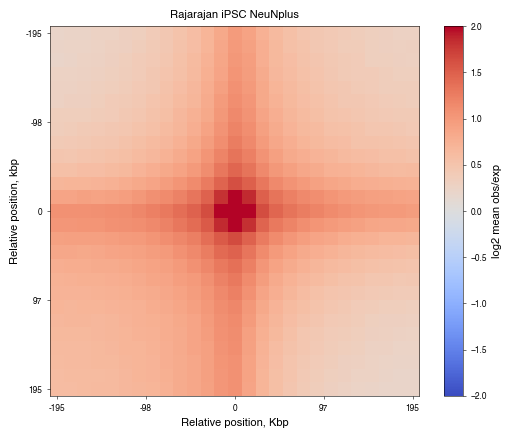

Heffel_adult_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


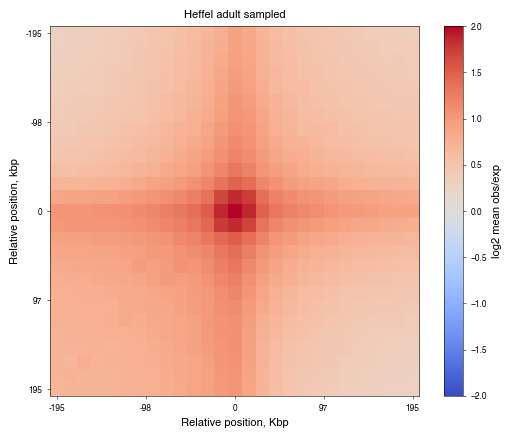

Our_data_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


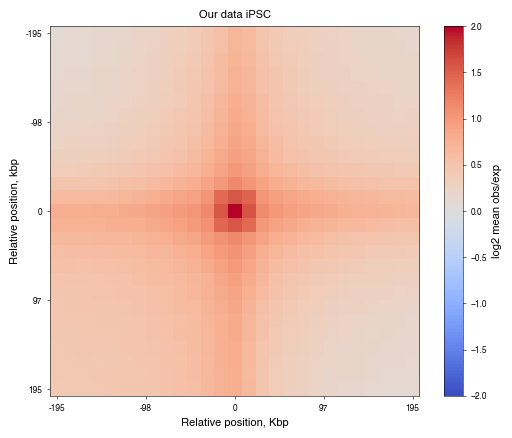

Ballerino2022_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


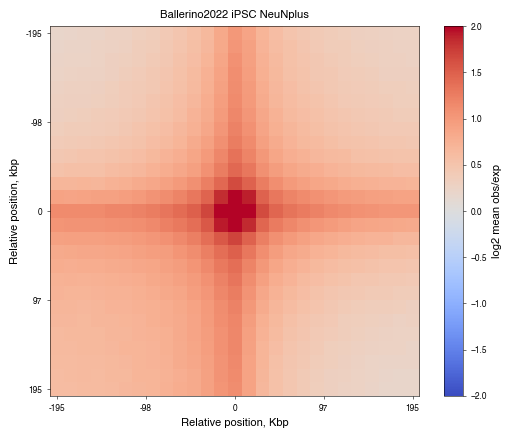

Li2022_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


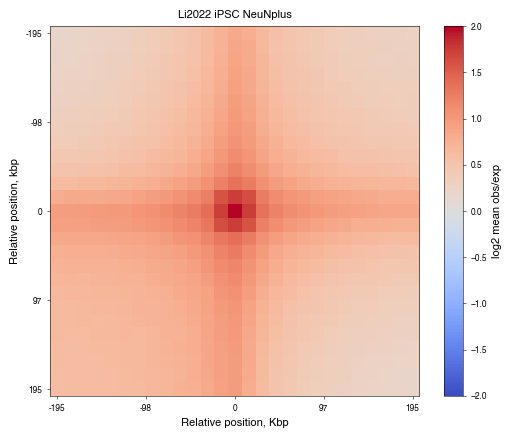

Hu2021_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed


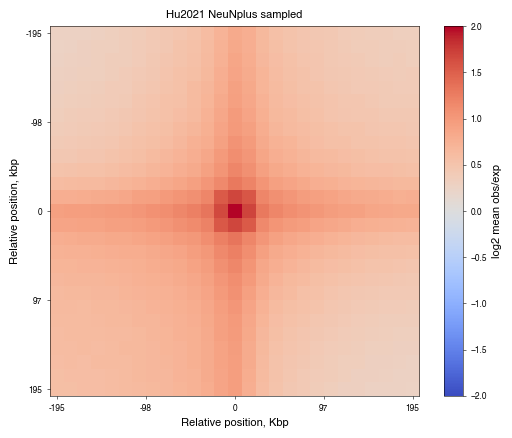

In [109]:
results_high_interval = {}
factor=13
for source in clusters_only_loops.source.unique():
    print(source)
    df = clusters_only_loops[clusters_only_loops.source == source]
    mtx, stack = create_matrix_calculated(source, df, factor=factor)
    results_high_interval[source]={}
    results_high_interval[source]["mtx"] = mtx
    results_high_interval[source]["stack"] = stack
    plot_loop(results_high_interval[source]["mtx"], label= (" ").join(source.split("_")[:3]), factor=factor)
    

In [118]:
len(results_high_interval.keys())

12

In [119]:
clusters_only_loops.source.nunique()

12

In [113]:
with open('./loops_data/average_loops_data/results_high_interval_average_loops.pickle', 'wb') as fp:
    pickle.dump(results_high_interval, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [120]:
sample2group = dict(mapping[["loop_file", "Group"]].values)
sample2group = {i:k for i,k in sample2group.items() if i in clusters_only_loops.source.unique()}



In [121]:
mean_loop = {}
for group in set(list(sample2group.values())):
    mean_loop[group] = []
    for sample, group_sample in sample2group.items():
        if group_sample == group:            
            mean_loop[group].append(results_high_interval[sample]['mtx'])

for group in set(list(sample2group.values())):
    mean_loop[group] = np.mean(mean_loop[group], axis=0)

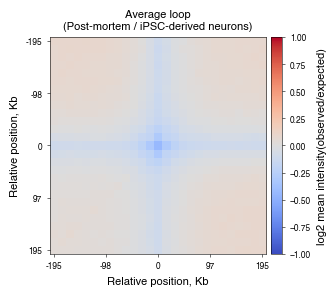

In [126]:
data = plot_ratio_all_loops(mean_loop, vmax=1, factor=13,resolution=15000, size=3)

In [128]:
array = np.log2(mean_loop['Post-mortem neurons']/mean_loop['iPSC-derived neurons'])
central_index = (array.shape[0] // 2, array.shape[1] // 2)
central_pixel = array[central_index]
central_index, central_pixel

((13, 13), -0.4343811692734475)

# 5. Ratio of loop intensities

In [133]:
ratios_df = merged_all_clusters[merged_all_clusters.status == 'retain'][['cluster','log2_ratio' ]].drop_duplicates()
ratios_df_log2ratio= np.array(ratios_df.log2_ratio.tolist())
ratios_df_log2ratio[ratios_df_log2ratio == -inf] = 0

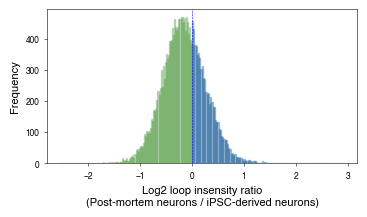

In [765]:
ratios_df_log2ratio = [i for i in ratios_df_log2ratio if -3 <= i <= 3]
plt.figure(figsize=(4, 2)) 

data_before_0 = [i for i in ratios_df_log2ratio if i < 0]
data_after_0 = [i for i in ratios_df_log2ratio if i >= 0]

color_before_0 = '#469433'  # Lighter shade of 'iPSC-derived neurons'
color_after_0 = '#034e91'   # Lighter shade of 'Post-mortem neurons'

plt.hist(data_before_0, bins=125, color=color_before_0, edgecolor=color_before_0, alpha=0.3, label='Before 0')
plt.hist(data_after_0, bins=125, color=color_after_0, edgecolor=color_after_0, alpha=0.3, label='After 0')
plt.axvline(x=0, color='blue', linestyle='--', linewidth=0.4)

# Add titles and labels
plt.xlabel('Log2 loop insensity ratio\n(Post-mortem neurons / iPSC-derived neurons)')
plt.ylabel('Frequency')
save_name = 'loop_histogram_ratio'
plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")
plt.show()

# 6. Loops by properties

In [135]:
save_name = "loops_clustering_post_mortem_vs_iPSC_derived"
merged_all_clusters_stats_trueLoops = pd.read_pickle(f"{path_to_loops_clusters_data}/{save_name}_merged_trueLoops_Properties.pickle")


In [136]:
def get_hg38_arms():
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    return hg38_arms[hg38_arms.chrom!='chrM'].reset_index(drop=True)
    

In [138]:
def create_matrix_calculated(source, merged_all_clusters_cluster,factor = 5,resolution = 15_000 ):    
    flank=factor*resolution
    stack = cooltools.pileup(maps_stored[source]['clr'], 
                             merged_all_clusters_cluster, 
                             view_df=hg38_arms, 
                             expected_df=maps_stored[source]['expected'], 
                             flank=flank)    
    mtx = np.nanmean(stack, axis=0)
    return mtx, stack

def plot_loop(mtx_from_cluster,label = None, factor = 5,resolution = 15_000):    
    flank=factor*resolution
    plt.imshow(
        np.log2(mtx_from_cluster),
        vmax = 2,
        vmin = -2,
        cmap='coolwarm')
    
    plt.colorbar(label = 'log2 mean obs/exp')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('Relative position, Kbp')
    plt.ylabel('Relative position, kbp')
    if label:
        plt.title(label)    
    plt.show()

def plot_ratio_all_loops(mean_loop, vmax=1, factor=13, resolution=15000, size=5, save_name = "loops_median_ratio"):
    plt.figure(figsize=(size, size))
    flank = factor * resolution
    data = np.log2(mean_loop['Post-mortem'] / mean_loop['iPSC-derived'])
    
    ax = plt.gca()
    im = ax.imshow(
        data,
        vmax=vmax,
        vmin=-vmax,
        cmap='coolwarm'
    )
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('log2 mean intensity(observed/expected)')
    
    ticks_pixels = np.linspace(0, flank * 2 // resolution, 5)
    ticks_kbp = ((ticks_pixels - ticks_pixels[-1] / 2) * resolution // 1000).astype(int)
    ax.set_xticks(ticks_pixels)
    ax.set_xticklabels(ticks_kbp)
    ax.set_yticks(ticks_pixels)
    ax.set_yticklabels(ticks_kbp)
    
    ax.set_title(f'{save_name} loop\n(Post-mortem / iPSC-derived neurons)')
    ax.set_xlabel('Relative position, Kb')
    ax.set_ylabel('Relative position, Kb')
   
    plt.savefig(f"./loops_visualizations/{save_name}.pdf", bbox_inches='tight', format = "pdf")
    
    plt.show()
    return data

In [141]:
hg38_arms = get_hg38_arms() 

In [142]:
results_high_interval_mode_status = {}
for status, column in zip(['down_in_post_mortem', 'up_in_post_mortem'], ["has_h3k27me3_peak_encode_anchor","has_h3k27me3_peak_kozlenkov_anchor"]):
    df = merged_all_clusters_stats_trueLoops[merged_all_clusters_stats_trueLoops.status_by_mu == status]
    df = df[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'source', 'cluster', 'group', "has_h3k27me3_peak_encode_anchor","has_h3k27me3_peak_kozlenkov_anchor", 'status_by_mu']].drop_duplicates()
    results_high_interval_mode = {}
    for mode in ['none', 'one_anh', 'both']:
        df2 = df[df[column] == mode]
        results_high_interval = {}
        factor=13
        for source in df2.source.unique():
            print(source)
            df3 = df2[df2.source == source]
            mtx, stack = create_matrix_calculated(source, df3, factor=factor)
            results_high_interval[source]={}
            results_high_interval[source]["mtx"] = mtx
            results_high_interval[source]["stack"] = stack
        results_high_interval_mode[mode] = results_high_interval
    results_high_interval_mode_status[status] =  results_high_interval_mode 

Tian2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Zaghi2023_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Wu2021_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Rahman2023_iPSC_NeuNplus_CRISPRi_Scrambled_A_DpnII-HinfI_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Pletenev2024_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Heffel_adult_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed
Rahman2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intens

In [362]:
df = merged_all_clusters_stats_trueLoops[merged_all_clusters_stats_trueLoops.status_by_mu == status]
df2 = df[df["has_h3k27me3_peak_kozlenkov_anchor"] == "both"]
df2.cluster.nunique()

104

In [380]:
for group in set(list(sample2group.values())):
        mean_loop[group] = np.median(mean_loop[group], axis=0)

In [375]:
sample2group_reduced = { 'Zaghi2023_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'iPSC-derived',
 'Wu2021_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'iPSC-derived',
 'Rahman2023_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'Post-mortem',
 'Pletenev2024_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'Post-mortem',
 'PsychENCODE_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'iPSC-derived',
 'Heffel_adult_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'Post-mortem',
 'Lagarkova_culture_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'iPSC-derived',
 'Li2022_iPSC_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'iPSC-derived',
 'Hu2021_NeuNplus_sampled_dots_final_12000000maxloci_0.13fdr_15000res_small_NaN5_final_sorted_with_intensity_removed_duplicates_noHeader.bed': 'Post-mortem'}

down_in_post_mortem none
(13, 13) -0.8473166755119063


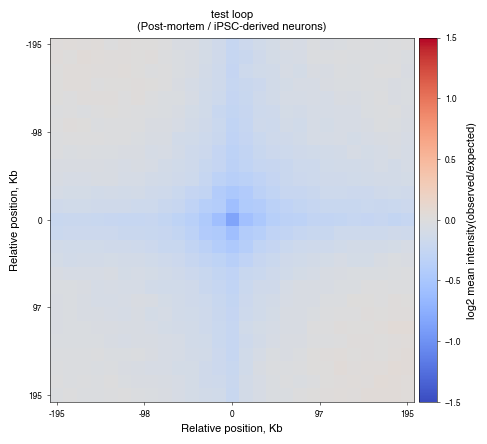

down_in_post_mortem one_anh
(13, 13) -0.8367042655055124


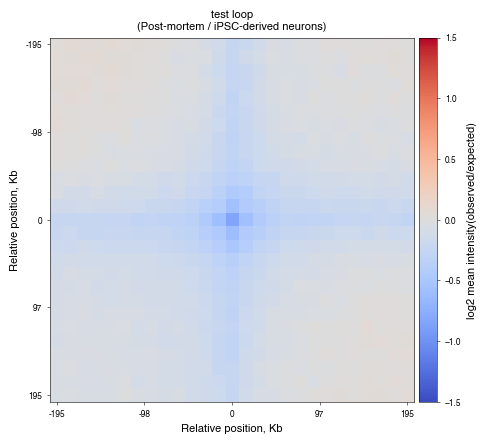

down_in_post_mortem both
(13, 13) -0.8676175403425586


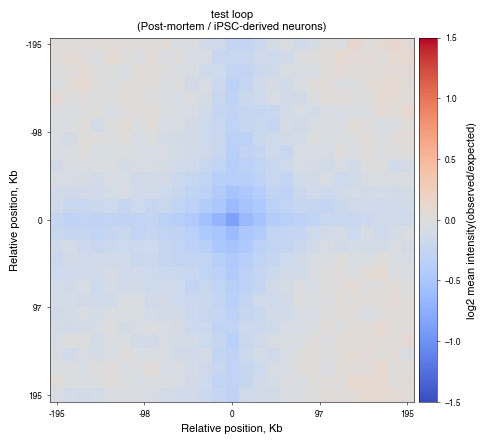

up_in_post_mortem none
(13, 13) 0.3330784840503654


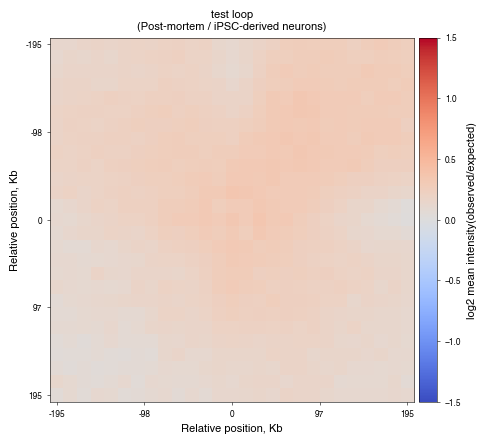

up_in_post_mortem one_anh
(13, 13) 0.5252962344896617


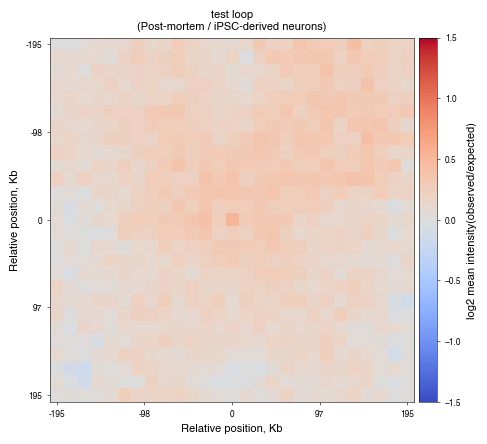

up_in_post_mortem both
(13, 13) 1.8270987694716436


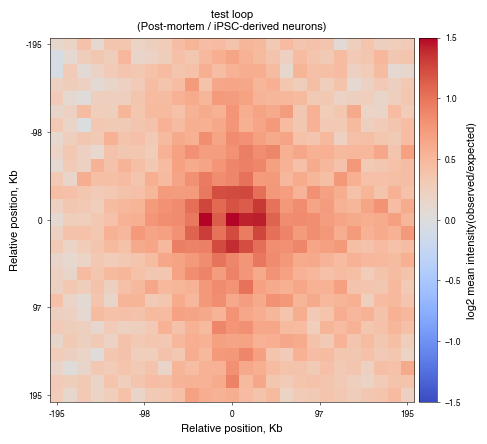

In [387]:
for status, column in zip(['down_in_post_mortem', 'up_in_post_mortem'], ["has_h3k27me3_peak_encode_anchor","has_h3k27me3_peak_kozlenkov_anchor"]):
    for mode in ['none', 'one_anh', 'both']:
        selected_res = results_high_interval_mode_status[status][mode]
        save_name="test"
        mean_loop = {}
        for group in set(list(sample2group.values())):
            mean_loop[group] = []
            for sample, group_sample in sample2group.items():
                if group_sample == group:            
                    mean_loop[group].append(selected_res[sample]['mtx'])
        
        for group in set(list(sample2group.values())):
            mean_loop[group] = np.mean(mean_loop[group], axis=0)
        print(status, mode)
        array = np.log2(mean_loop['Post-mortem']/mean_loop['iPSC-derived'])
        central_index = (array.shape[0] // 2, array.shape[1] // 2)
        central_pixel = array[central_index]
        central_index, central_pixel
        print(central_index, central_pixel)
    
        data = plot_ratio_all_loops(mean_loop, vmax = 1.5, save_name = save_name)